## SPARQL Visualizing
In this notebook the queries retrieved from dbpedia with SPARQL will be visualized

In [1]:
import pandas as pd
import os

os.chdir('/Users/jellewas/Documents/Master_Artificial_Intelligence/KROnTheWeb')

data_points = pd.read_csv(os.getcwd() + '/query-result.csv')


### Gastrodon
Install the gastrodon package to work more easily with the SPARQL data

In [ ]:
pip install gastrodon

In [2]:
import sys
from collections import OrderedDict
from rdflib import Graph,URIRef
from gastrodon import LocalEndpoint,one,QName
import gzip
import pandas as pd
pd.set_option("display.width",100)
pd.set_option("display.max_colwidth",80)

Show the difference between queries where owl:sameAs is implemented and queries where it was not.

In [3]:
sameAspath = os.getcwd() + '/Final_Query.rdf'
not_sameAspath = os.getcwd() + '/query-result.rdf'

G = Graph()
H = Graph()

G.parse(sameAspath)
H.parse(not_sameAspath)

<Graph identifier=N3236f03d7f924118a80dc49f7e66241f (<class 'rdflib.graph.Graph'>)>

## Plot Differences 
Now the differences can be plotted between when owl:sameAs was implemented in the SPARQL query and when this was not the case

In [4]:
e = LocalEndpoint(G)

properties=e.select("""
   SELECT ?p (COUNT(*) AS ?cnt) {
      ?s ?p ?o .
   } GROUP BY ?p ORDER BY DESC(?cnt)
""")

f = LocalEndpoint(H)

properties_2=f.select("""
   SELECT ?p (COUNT(*) AS ?cnt) {
      ?s ?p ?o .
   } GROUP BY ?p ORDER BY DESC(?cnt)
""")


Text(0, 0.5, '')

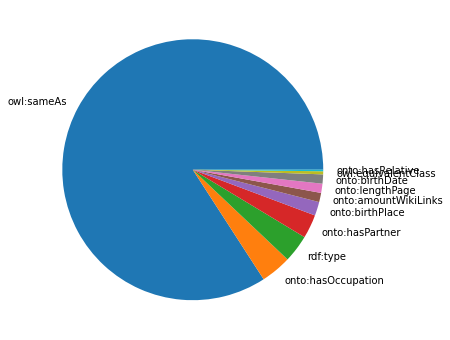

In [5]:
properties["cnt"].plot.pie(figsize=(6,6)).set_ylabel('')

Text(0, 0.5, '')

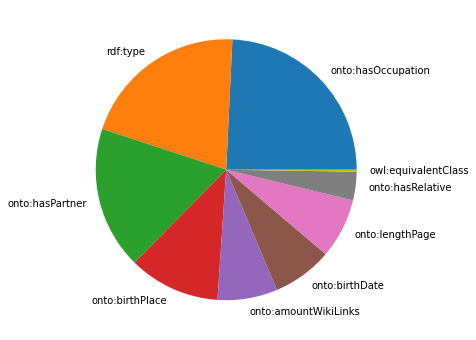

In [6]:
properties_2["cnt"].plot.pie(figsize=(6,6)).set_ylabel('')